In [1]:
# Import KmdPlus module.
import matplotlib.pyplot as plt
import numpy as np

# Import libraries.
import pandas as pd
from sklearn.decomposition import PCA
from pymatgen.core.composition import Composition

from foundation_model.utils.kmd_plus import (
    KMD,
    StatsDescriptor,
    element_features,  # Element-level descriptors of shape (94, 58).
    formula_to_composition,
)

# Load the dataset for the KmdPlus tutorial.
# Chemical formulas of all stable materials listed in Materials Project (2022/08/07), and their formation energies.
MP_stable = pd.read_parquet("../qc_ac_te_mp_dos_reformat_20250615.pd.parquet")
MP_stable.composition = MP_stable.composition.apply(lambda x: {k: v for k, v in x.items() if v is not None})

fliter = [Composition.from_dict(comp).valid for comp in MP_stable.composition]
MP_stable = MP_stable[fliter]
MP_stable

,formula,Material type,Space group,composition,elements,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,...,Electrical resistivity (normalized),Power factor (normalized),Seebeck coefficient (normalized),Thermal conductivity (normalized),ZT (normalized),Magnetic susceptibility (normalized),DOS energy,DOS density,DOS density (normalized),split
id,,,,,,,,,,,,,,,,,,,,,
mp-111,Ne,others,Fm-3m,{'Ne': 1.0},[Ne],11.6898,1.815607,-9.772494,-1.912824,0.000000,...,None,None,None,None,None,None,None,None,None,val
mp-23158,He,others,Im-3m,{'He': 1.0},[He],17.6377,0.384324,-13.591344,-0.313901,0.000000,...,None,None,None,None,None,None,None,None,None,train
mp-23155,Ar,others,Fm-3m,{'Ar': 1.0},[Ar],8.5132,1.720053,-5.482198,-4.858515,0.000000,...,None,None,None,None,None,None,None,None,None,train
mp-1525632,F2,others,Cmce,{'F': 4.0},[F],2.8979,2.366529,-4.635707,-3.126028,0.000000,...,None,None,None,None,None,None,None,None,None,val
mp-1095223,OF2,others,Pnma,"{'F': 8.0, 'O': 4.0}","[F, O]",2.1241,2.196288,-2.171794,-3.421278,-0.496056,...,None,None,None,None,None,None,None,None,None,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-1201016,Cs9Fe2Se7,others,P2_13,"{'Cs': 36.0, 'Fe': 8.0, 'Se': 28.0}","[Cs, Fe, Se]",0.5130,4.183524,1.776250,-3.858616,-1.103992,...,None,None,None,None,None,None,None,None,None,test
mp-581173,Cs10Si7O9,others,P2/c,"{'Cs': 40.0, 'O': 36.0, 'Si': 28.0}","[Cs, O, Si]",1.4150,3.676090,2.604339,-5.347066,-1.824426,...,None,None,None,None,None,None,None,None,None,train
mp-582182,Cs5In3As4,others,P2_1/c,"{'As': 32.0, 'Cs': 40.0, 'In': 24.0}","[As, Cs, In]",0.9419,4.834335,3.608423,-3.032848,-0.408023,...,None,None,None,None,None,None,None,None,None,train


In [2]:
# Convert chemical formulas to compositions.
MP_weight = MP_stable.composition.apply(formula_to_composition)
MP_weight = np.stack(MP_weight.values)
component_features = element_features

print(MP_weight.shape)
print(component_features.shape)

(49001, 94)
(94, 58)


In [3]:
# Generate the kernel mean descriptors (KMD) for each feature, then combine them.
kmd_1d = KMD("1d")  # Unidimensional KMD; the kernel mean is discretized at the n_grids equally spaced grids

# Generate 2 types of descriptors with the default settings (materials → descriptors).
kmd1d = kmd_1d.transform(MP_weight, component_features, 10)

# Add index to the KMD DataFrame.
kmd1d_desc = pd.DataFrame(kmd1d, index=MP_stable.index)

# Save the KMD descriptors to a file.
kmd1d_desc.to_parquet("../qc_ac_te_mp_dos_kmd1d_desc_20250615.pd.parquet")

/Users/liuchang/projects/foundation_model/src/foundation_model/utils/kmd_plus.py:160: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid_points = np.linspace(min_cf[i], max_cf[i], n_grids)


In [4]:
kmd1d_desc

,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,574,575,576,577,578,579
id,,,,,,,,,,,,,,,,,,,,,
mp-111,0.468329,0.983489,0.279511,0.010751,5.596171e-05,3.942336e-08,3.758610e-12,4.849668e-17,8.468524e-23,2.001311e-29,...,0.999173,0.389343,0.020532,0.000147,1.415384e-07,1.850164e-11,3.273086e-16,7.836380e-22,2.539128e-28,1.113435e-35
mp-23158,0.990678,0.442278,0.026722,0.000219,2.417959e-07,3.621226e-11,7.339616e-16,2.013270e-21,7.473807e-28,3.754851e-35,...,1.000000,0.367879,0.018316,0.000123,1.125352e-07,1.388794e-11,2.319523e-16,5.242886e-22,1.603811e-28,6.639677e-36
mp-23155,0.066766,0.659527,0.881694,0.159520,3.905907e-03,1.294316e-05,5.804571e-09,3.522985e-13,2.893760e-18,3.216809e-24,...,0.953478,0.542747,0.041811,0.000436,6.150670e-07,1.174500e-10,3.035250e-15,1.061566e-20,5.024706e-27,3.218736e-34
mp-1525632,0.549154,0.950290,0.222550,0.007054,3.025566e-05,1.756355e-08,1.379841e-12,1.467090e-17,2.111035e-23,4.110978e-30,...,0.997143,0.408249,0.022621,0.000170,1.721457e-07,2.364333e-11,4.394727e-16,1.105519e-21,3.763672e-28,1.734076e-35
mp-1095223,0.576763,0.933917,0.206337,0.006216,2.552183e-05,1.426889e-08,1.085614e-12,1.123253e-17,1.579515e-23,3.016913e-30,...,0.995362,0.417986,0.023785,0.000183,1.916446e-07,2.713781e-11,5.207753e-16,1.354346e-21,4.773284e-28,2.279903e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-1201016,0.000333,0.017983,0.186781,0.457428,3.233539e-01,4.901673e-01,2.747252e-01,2.147425e-02,2.272870e-04,3.255714e-07,...,0.313502,0.419863,0.109274,0.006040,5.881982e-05,1.411125e-07,6.170492e-05,9.157819e-03,1.839397e-01,5.000000e-01
mp-581173,0.274066,0.563829,0.215471,0.017237,8.574810e-02,3.654962e-01,2.112132e-01,1.651850e-02,1.748362e-04,2.504395e-07,...,0.483163,0.411047,0.074266,0.002291,1.028568e-05,4.965044e-08,4.746531e-05,7.044476e-03,1.414921e-01,3.846154e-01
mp-582182,0.000023,0.004107,0.100347,0.349857,4.050370e-01,6.252847e-01,2.687671e-01,1.887160e-02,1.926416e-04,2.727606e-07,...,0.250725,0.480310,0.248560,0.029073,5.345704e-04,1.415583e-06,5.142123e-05,7.631516e-03,1.532831e-01,4.166667e-01


In [5]:
# Generate the kernel mean descriptors (KMD) for each feature, then combine them.
kmd_1d = KMD("1d")  # Unidimensional KMD; the kernel mean is discretized at the n_grids equally spaced grids
# between a maximum and minimum values for each feature.

# Generate 2 types of descriptors with the default settings (materials → descriptors).
kmd1d = kmd_1d.transform(MP_weight, component_features, 10)
ssd = StatsDescriptor(MP_weight, component_features)

# Scaling the summary statistics descriptors (SSD).
ssd_scaled = (ssd - ssd.mean(axis=0)) / ssd.std(axis=0, ddof=1)
formation_energy = np.array(MP_stable["formation_energy_per_atom"])

print(kmd1d.shape)
print(ssd_scaled.shape)

/Users/liuchang/projects/foundation_model/src/foundation_model/utils/kmd_plus.py:160: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid_points = np.linspace(min_cf[i], max_cf[i], n_grids)


KeyError: 'formation_energy_per_atom'

In [15]:
def decoded_weight_to_composition(decoded_weight, component_features, *, min_ratio=0.0):
    """
    Convert decoded weights to a list of composition dictionaries.
    Elements with ratio < min_ratio are filtered out, and their mass is
    redistributed evenly among the remaining elements.
    All ratios are normalized to 0.005 intervals.

    Args:
        decoded_weight: numpy array of shape (n_samples, n_elements) containing element ratios
        component_features: pandas DataFrame with element symbols as index
        min_ratio: minimum ratio threshold for keeping an element (default: 0.0)

    Returns:
        List of dictionaries, each mapping element symbols to their ratios
    """
    compositions = []
    element_symbols = component_features.index.tolist()

    for i in range(decoded_weight.shape[0]):
        # Get non-zero ratios
        raw_composition = {}
        for j, element in enumerate(element_symbols):
            ratio = decoded_weight[i, j]
            if ratio > 0:
                raw_composition[element] = ratio.item()

        # Filter ratios >= min_ratio
        filtered_composition = {k: v for k, v in raw_composition.items() if v >= min_ratio}

        if not filtered_composition:
            # If all ratios < min_ratio, keep the largest one
            if raw_composition:
                max_element = max(raw_composition, key=raw_composition.get)
                compositions.append({max_element: 1.0})
            else:
                compositions.append({})
            continue

        # Calculate total mass to redistribute
        total_mass = sum(raw_composition.values())
        filtered_mass = sum(filtered_composition.values())
        redistributed_mass = total_mass - filtered_mass

        # Redistribute evenly among remaining elements
        num_remaining = len(filtered_composition)
        redistribution_per_element = redistributed_mass / num_remaining

        # Apply redistribution and normalize to 0.005 intervals
        final_composition = {}
        for element, ratio in filtered_composition.items():
            new_ratio = ratio + redistribution_per_element
            # Round to nearest 0.005
            normalized_ratio = round(new_ratio / 0.005) * 0.005
            final_composition[element] = normalized_ratio

        compositions.append(final_composition)

    return compositions

In [7]:
import joblib


result_input = joblib.load('../advanced_optimization_result_input.pkl.z')
result_latent = joblib.load('../advanced_optimization_result_latent.pkl.z')


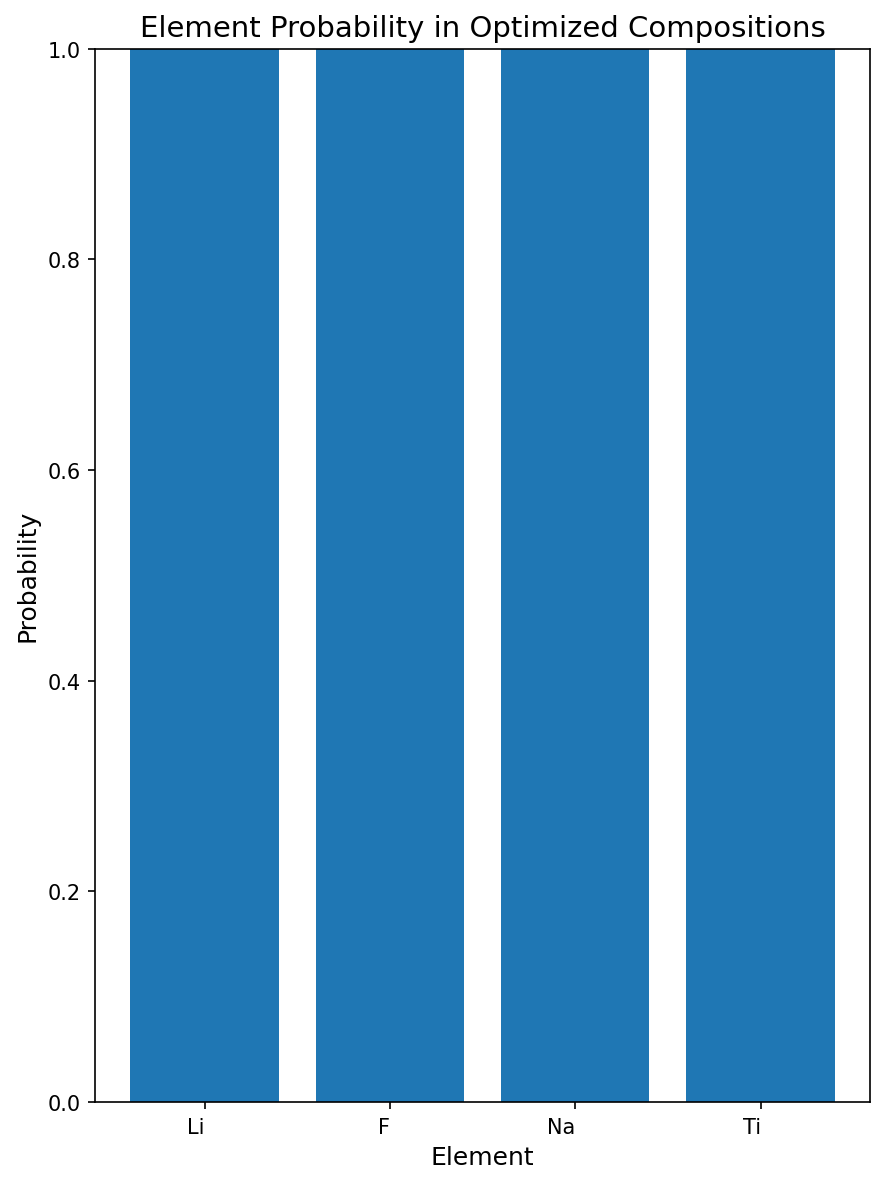

[{'Li': 0.22, 'F': 0.225, 'Na': 0.255, 'Ti': 0.305},
 {'Li': 0.21, 'F': 0.22, 'Na': 0.26, 'Ti': 0.31},
 {'Li': 0.22, 'F': 0.23, 'Na': 0.25, 'Ti': 0.3},
 {'Li': 0.2, 'F': 0.215, 'Na': 0.265, 'Ti': 0.32},
 {'Li': 0.20500000000000002, 'F': 0.215, 'Na': 0.265, 'Ti': 0.315},
 {'Li': 0.20500000000000002, 'F': 0.22, 'Na': 0.26, 'Ti': 0.315},
 {'Li': 0.23, 'F': 0.215, 'Na': 0.255, 'Ti': 0.305},
 {'Li': 0.22, 'F': 0.225, 'Na': 0.25, 'Ti': 0.3},
 {'Li': 0.20500000000000002, 'F': 0.22, 'Na': 0.26, 'Ti': 0.315},
 {'Li': 0.22, 'F': 0.225, 'Na': 0.255, 'Ti': 0.305},
 {'Li': 0.20500000000000002, 'F': 0.215, 'Na': 0.26, 'Ti': 0.315},
 {'Li': 0.215, 'F': 0.225, 'Na': 0.255, 'Ti': 0.305},
 {'Li': 0.21, 'F': 0.215, 'Na': 0.26, 'Ti': 0.315},
 {'Li': 0.21, 'F': 0.22, 'Na': 0.26, 'Ti': 0.31},
 {'Li': 0.215, 'F': 0.215, 'Na': 0.26, 'Ti': 0.31},
 {'Li': 0.215, 'F': 0.225, 'Na': 0.255, 'Ti': 0.305},
 {'Li': 0.21, 'F': 0.22, 'Na': 0.26, 'Ti': 0.31},
 {'Li': 0.22, 'F': 0.215, 'Na': 0.255, 'Ti': 0.31},
 {'Li': 0.

In [30]:
decoded_weight = kmd_1d.inverse_transform(result_latent.optimized_input[50])
optimized_comps = decoded_weight_to_composition(decoded_weight, component_features, min_ratio=0.1)
# Count element frequencies across all compositions
element_counts = {}
for comp in optimized_comps:
    for element in comp.keys():
        element_counts[element] = element_counts.get(element, 0) + 1

# Calculate probabilities
total_compositions = len(optimized_comps)
element_probs = {element: count / total_compositions for element, count in element_counts.items()}

# Sort by probability
sorted_elements = sorted(element_probs.items(), key=lambda x: x[1], reverse=True)
elements, probs = zip(*sorted_elements)

# Create bar plot
plt.figure(figsize=(6, 8), dpi=150)
plt.bar(elements, probs)
plt.xlabel('Element', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Element Probability in Optimized Compositions', fontsize=14)
plt.xticks(rotation=0, ha='right')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

optimized_comps

/Users/liuchang/projects/foundation_model/src/foundation_model/utils/kmd_plus.py:287: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid_points = np.linspace(min_cf[i], max_cf[i], n_grids)


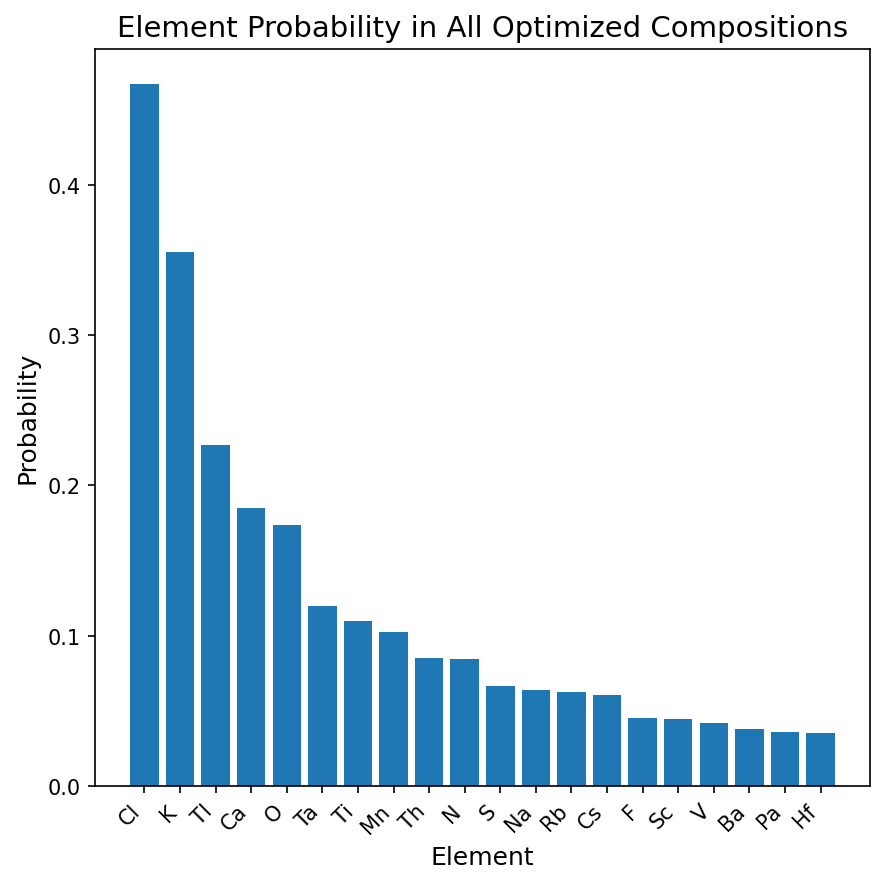

Total compositions analyzed: 1780
Number of unique elements: 49


In [37]:
# Collect all compositions from all optimization results
all_compositions = []
for i in range(len(result_input.optimized_input)):
    decoded_weight = kmd_1d.inverse_transform(result_input.optimized_input[i])
    optimized_comps = decoded_weight_to_composition(decoded_weight, component_features, min_ratio=0.1)
    all_compositions.extend(optimized_comps)

# Count element frequencies across all compositions
element_counts = {}
for comp in all_compositions:
    for element in comp.keys():
        element_counts[element] = element_counts.get(element, 0) + 1

# Calculate probabilities
total_compositions = len(all_compositions)
element_probs = {element: count / total_compositions for element, count in element_counts.items()}

# Sort by probability
sorted_elements = sorted(element_probs.items(), key=lambda x: x[1], reverse=True)
elements, probs = zip(*sorted_elements[:20])

# Create bar plot
plt.figure(figsize=(6, 6), dpi=150)
plt.bar(elements, probs)
plt.xlabel('Element', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Element Probability in All Optimized Compositions', fontsize=14)
plt.xticks(rotation=45, ha='right')
# plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

print(f"Total compositions analyzed: {total_compositions}")
print(f"Number of unique elements: {len(element_probs)}")


In [40]:
# Inverse-translate the KMD into the weights of the components (descriptors → materials).
decoded_weight = kmd_1d.inverse_transform(kmd1d)

# Compute the reconstruction error between the weights used to generate the KMD and the decoded weights.
MAE = np.mean((abs(MP_weight - decoded_weight)).sum(1))
print(f"Reconstructuion error (MAE) is {MAE}.")
print("The weights used to generate the KMD were successfully reconstructed except for numerical errors.")

/Users/liuchang/projects/foundation_model/src/foundation_model/utils/kmd_plus.py:287: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid_points = np.linspace(min_cf[i], max_cf[i], n_grids)


Reconstructuion error (MAE) is 2.549242461741063e-05.
The weights used to generate the KMD were successfully reconstructed except for numerical errors.


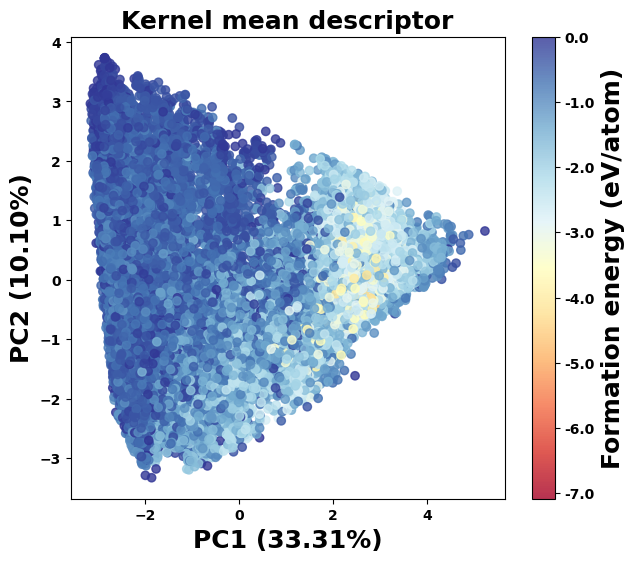

In [ ]:
# PCA visualization of the KMD.

pca = PCA()
x = kmd1d
pca.fit(x)
feature = pca.transform(x)

cm = plt.colormaps.get_cmap("RdYlBu")
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mappable = ax.scatter(feature[:, 0], feature[:, 1], c=formation_energy, cmap=cm, alpha=0.8)
cb = fig.colorbar(mappable, ax=ax)
cb.set_ticks(cb.ax.get_yticks()[1:])  # delete -8.0.
cb.ax.set_yticklabels(labels=cb.ax.get_yticks(), fontsize=10, weight="bold")
cb.set_label("Formation energy (eV/atom)", size=18, fontweight="bold")
plt.title("Kernel mean descriptor", fontsize=18, fontweight="bold")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.show()

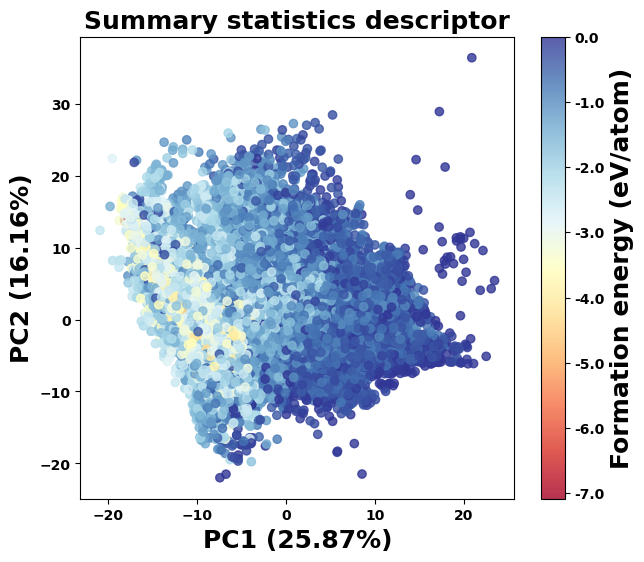

In [ ]:
# PCA visualization of the SumarryStats descriptor ("mean", "var", "max", "min").

pca = PCA()
x = ssd_scaled
pca.fit(x)
feature = pca.transform(x)

cm = plt.colormaps.get_cmap("RdYlBu")
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mappable = ax.scatter(feature[:, 0], feature[:, 1], c=formation_energy, cmap=cm, alpha=0.8)
cb = fig.colorbar(mappable, ax=ax)
cb.set_ticks(cb.ax.get_yticks()[1:])
cb.ax.set_yticklabels(labels=cb.ax.get_yticks(), fontsize=10, weight="bold")
cb.set_label("Formation energy (eV/atom)", size=18, fontweight="bold")
plt.title("Summary statistics descriptor", fontsize=18, fontweight="bold")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.show()